<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_2_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 6 Material

* Part 6.1: Image Processing in Python [[Video]](https://www.youtube.com/watch?v=4Bh3gqHkIgc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_1_python_images.ipynb)
* **Part 6.2: Keras Neural Networks for Digits and Fashion MNIST** [[Video]](https://www.youtube.com/watch?v=-SA8BmGvWYE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_2_cnn.ipynb)
* Part 6.3: Implementing a ResNet in Keras [[Video]](https://www.youtube.com/watch?v=qMFKsMeE6fM&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_3_resnet.ipynb)
* Part 6.4: Using Your Own Images with Keras [[Video]](https://www.youtube.com/watch?v=VcFja1fUNSk&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_4_keras_images.ipynb)
* Part 6.5: Recognizing Multiple Images with YOLO Darknet [[Video]](https://www.youtube.com/watch?v=oQcAKvBFli8&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_5_yolo.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

Note: using Google CoLab


# Part 6.2: Keras Neural Networks for Digits and Fashion MNIST

# Computer Vision

This class will focus on computer vision.  There are some important differences and similarities with previous neural networks.

* We will usually use classification, though regression is still an option.
* The input to the neural network is now 3D (height, width, color)
* Data are not transformed, no z-scores or dummy variables.
* Processing time is much longer.
* We now have different layer times: dense layers (just like before), convolution layers and max pooling layers.
* Data will no longer arrive as CSV files. TensorFlow provides some utilities for going directly from image to the input for a neural network.


# Computer Vision Data Sets

There are many data sets for computer vision.  Two of the most popular are the MNIST digits data set and the CIFAR image data sets.

### MNIST Digits Data Set

The [MNIST Digits Data Set](http://yann.lecun.com/exdb/mnist/) is very popular in the neural network research community.  A sample of it can be seen in Figure 6.MNIST.

**Figure 6.MNIST: MNIST Data Set**
![MNIST Data Set](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_8_mnist.png "MNIST Data Set")

This data set was generated from scanned forms, such as seen in Figure 6.EXAM.

**Figure 6.EXAM: Exam Forms**
![Exam](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_8_exam.png "Exam")

### MNIST Fashion Data Set

[Fashion-MNIST](https://www.kaggle.com/zalando-research/fashionmnist) is a dataset of [Zalando](https://jobs.zalando.com/tech/)'s article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct **drop-in replacement** for the original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. This data can be seen in Figure 6.MNIST-FASHION.

**Figure 6.MNIST-FASHION: MNIST Fashon Data Set**
![mnist-fashion](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/mnist-fashion.png "mnist-fashion")

### CIFAR Data Set

The [CIFAR-10 and CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) datasets are also frequently used by the neural network research community.

**Figure 6.CIFAR: CIFAR Data Set**
![CIFAR Data Set](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_8_cifar.png "CIFAR Data Set")

The CIFAR-10 data set contains low-rez images that are divided into 10 classes.  The CIFAR-100 data set contains 100 classes in a hierarchy. 

# Other Resources

* [Imagenet:Large Scale Visual Recognition Challenge 2014](http://image-net.org/challenges/LSVRC/2014/index)
* [Andrej Karpathy](http://cs.stanford.edu/people/karpathy/) - PhD student/instructor at Stanford.
    * [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/) - Stanford course on computer vision/CNN's.
        * [CS231n - GitHub](http://cs231n.github.io/)
    * [ConvNetJS](http://cs.stanford.edu/people/karpathy/convnetjs/) - JavaScript library for deep learning.
 

# Convolutional Neural Networks (CNNs)

The convolutional neural network (CNN) is a neural network technology that has profoundly impacted the area of computer vision (CV). Fukushima  (1980) [[Cite:fukushima1980neocognitron]](https://www.rctn.org/bruno/public/papers/Fukushima1980.pdf) introduced the original concept of a convolutional neural network, and   LeCun, Bottou, Bengio & Haffner (1998) [[Cite:lecun1995convolutional]](http://yann.lecun.com/exdb/publis/pdf/lecun-bengio-95a.pdf) greatly improved this work. From this research, Yan LeCun introduced the famous LeNet-5 neural network architecture.  This chapter follows the LeNet-5 style of convolutional neural network.  
Although computer vision primarily uses CNNs, this technology has some application outside of the field. You need to realize that if you want to utilize CNNs on non-visual data, you must find a way to encode your data so that it can mimic the properties of visual data.  

CNNs are somewhat similar to the self-organizing map (SOM) architecture that we examined in Chapter 2, “Self-Organizing Maps.”  The order of the vector elements is crucial to the training. In contrast, most neural networks that are not CNNs or SOMs treat their input data as a long vector of values, and the order that you arrange the incoming features in this vector is irrelevant. For these types of neural networks, you cannot change the order after you have trained the network. In other words, CNNs and SOMs do not follow the standard treatment of input vectors. 
The SOM network arranged the inputs into a grid.  This arrangement worked well with images because the pixels in closer proximity to each other are important to each other.  Obviously, the order of pixels in an image is significant.  The human body is a relevant example of this type of order. For the design of the face, we are accustomed to eyes being near to each other.  In the same way, neural network types like SOMs adhere to an order of pixels. Consequently, they have many applications to computer vision. 

This advance in CNNs is due to years of research on biological eyes. In other words, CNNs utilize overlapping fields of input to simulate features of biological eyes. Until this breakthrough, AI had been unable to reproduce the capabilities of biological vision.
Scale, rotation, and noise have presented challenges in the past for AI computer vision research.  You can observe the complexity of biological eyes in the example that follows. A friend raises a sheet of paper with a large number written on it.  As your friend moves nearer to you, the number is still identifiable. In the same way, you can still identify the number when your friend rotates the paper.  Lastly, your friend creates noise by drawing lines on top of the page, but you can still identify the number. As you can see, these examples demonstrate the high function of the biological eye and allow you to understand better the research breakthrough of CNNs. That is, this neural network has the ability to process scale, rotation, and noise in the field of computer vision. This network structure can be seen in Figure 6.LENET.

**Figure 6.LENET: A LeNET-5 Network (LeCun, 1998)**
![A LeNET-5 Network](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_8_lenet5.png "A LeNET-5 Network")

So far we have only seen one layer type (dense layers).  By the end of this course we will have seen:

* **Dense Layers** - Fully connected layers.  (introduced previously)
* **Convolution Layers** - Used to scan across images. (introduced this class)
* **Max Pooling Layers** - Used to downsample images. (introduced this class)
* **Dropout Layer** - Used to add regularization. (introduced next class)

## Convolution Layers

The first layer that we will examine is the convolutional layer. We will begin by looking at the hyper-parameters that you must specify for a convolutional layer in most neural network frameworks that support the CNN:

* Number of filters
* Filter Size
* Stride
* Padding
* Activation Function/Non-Linearity

The primary purpose for a convolutional layer is to detect features such as edges, lines, blobs of color, and other visual elements. The filters can detect these features. The more filters that we give to a convolutional layer, the more features it can detect.

A filter is a square-shaped object that scans over the image. A grid can represent the individual pixels of a grid. You can think of the convolutional layer as a smaller grid that sweeps left to right over each row of the image. There is also a hyper parameter that specifies both the width and height of the square-shaped filter. The following figure shows this configuration in which you see the six convolutional filters sweeping over the image grid:

A convolutional layer has weights between it and the previous layer or image grid. Each pixel on each convolutional layer is a weight. Therefore, the number of weights between a convolutional layer and its predecessor layer or image field is the following:

```
[FilterSize] * [FilterSize] * [# of Filters]
```

For example, if the filter size were 5 (5x5) for 10 filters, there would be 250 weights.

You need to understand how the convolutional filters sweep across the previous layer’s output or image grid. Figure 6.CNN illustrates the sweep:

**Figure 6.CNN: Convolutional Neural Network**
![Convolutional Neural Network](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_8_cnn_grid.png "Convolutional Neural Network")

The above figure shows a convolutional filter with a size of 4 and a padding size of 1. The padding size is responsible for the boarder of zeros in the area that the filter sweeps. Even though the image is actually 8x7, the extra padding provides a virtual image size of 9x8 for the filter to sweep across. The stride specifies the number of positions at which the convolutional filters will stop. The convolutional filters move to the right, advancing by the number of cells specified in the stride. Once the far right is reached, the convolutional filter moves back to the far left, then it moves down by the stride amount and
continues to the right again.

Some constraints exist in relation to the size of the stride. Obviously, the stride cannot be 0. The convolutional filter would never move if the stride were set to 0. Furthermore, neither the stride, nor the convolutional filter size can be larger than the previous grid. There are additional constraints on the stride (s), padding (p) and the filter width (f) for an image of width (w). Specifically, the convolutional filter must be able to start at the far left or top boarder, move a certain number of strides, and land on the far right or bottom boarder. The following equation shows the number of steps a convolutional operator
must take to cross the image:

$ steps = \frac{w - f + 2p}{s+1} $

The number of steps must be an integer. In other words, it cannot have decimal places. The purpose of the padding (p) is to be adjusted to make this equation become an integer value.

## Max Pooling Layers

Max-pool layers downsample a 3D box to a new one with smaller dimensions. Typically, you can always place a max-pool layer immediately following convolutional layer. The LENET shows the max-pool layer immediately after layers C1 and C3. These max-pool layers progressively decrease the size of the dimensions of the 3D boxes passing through them. This technique can avoid overfitting (Krizhevsky, Sutskever & Hinton, 2012).

A pooling layer has the following hyper-parameters:

* Spatial Extent (f )
* Stride (s)

Unlike convolutional layers, max-pool layers do not use padding. Additionally, max-pool layers have no weights, so training does not affect them. These layers simply downsample their 3D box input. The 3D box output by a max-pool layer will have a width equal to this equation:

$ w_2 = \frac{w_1 - f}{s + 1} $

The height of the 3D box produced by the max-pool layer is calculated similarly with this equation:

$ h_2 = \frac{h_1 - f}{s + 1} $

The depth of the 3D box produced by the max-pool layer is equal to the depth the 3D box received as input. The most common setting for the hyper-parameters of a max-pool layer are f =2 and s=2. The spatial extent (f) specifies that boxes of 2x2 will be scaled down to single pixels. Of these four pixels, the pixel with the maximum value will represent the 2x2 pixel in the new grid. Because squares of size 4 are replaced with size 1, 75% of the pixel information is lost. The following figure shows this transformation as a 6x6 grid becomes a 3x3:

**Figure 6.MAXPOOL: Max Pooling Layer**
![Max Pooling Layer](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_8_conv_maxpool.png "Max Pooling Layer")

Of course, the above diagram shows each pixel as a single number. A grayscale image would have this characteristic. For an RGB image, we usually take the average of the three numbers to determine which pixel has the maximum value.

[More information on CNN's](http://cs231n.github.io/convolutional-networks/)

# TensorFlow with CNNs

The following sections describe how to use TensorFlow/Keras with CNNs.

### Access to Data Sets - DIGITS

Keras provides built in access classes for MNIST.  It is important to note that MNIST data arrives already separated into two sets:

* **train** - Neural network will be trained with this.
* **test** - Used for validation.

In [2]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


### Display the Digits 

The following code shows what the MNIST files contain.

In [3]:
# Display as text
from IPython.display import display
import pandas as pd

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,0,0,55,172,226,253,253,253,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,136,253,253,253,212,135,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Image (#105): Which is digit '1'


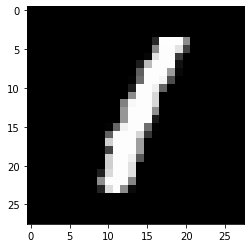

In [4]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 105 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

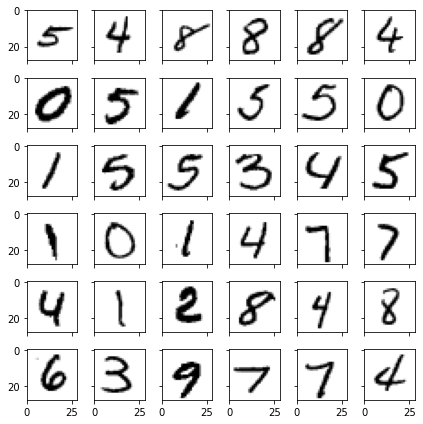

In [5]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [6]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


### Training/Fitting CNN - DIGITS

The following code will train the CNN for 20,000 steps.  This can take awhile, you might want to scale the step count back. GPU training can help.  My results:

* CPU Training Time: Elapsed time: 1:50:13.10
* GPU Training Time: Elapsed time: 0:13:43.06

In [7]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
469/469 - 3s - loss: 0.2301 - accuracy: 0.9306 - val_loss: 0.0507 - val_accuracy: 0.9832
Epoch 2/12
469/469 - 3s - loss: 0.0821 - accuracy: 0.9758 - val_loss: 0.0356 - val_accuracy: 0.9877
Epoch 3/12
469/469 - 3s - loss: 0.0606 - accuracy: 0.9813 - val_loss: 0.0305 - val_accuracy: 0.9894
Epoch 4/12
469/469 - 3s - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0286 - val_accuracy: 0.9901
Epoch 5/12
469/469 - 3s - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.0279 - val_accuracy: 0.9903
Epoch 6/12
469/469 - 3s - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0269 - val_accuracy: 0.9913
Epoch 7/12
469/469 - 3s - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0254 - val_accuracy: 0.9919
Epoch 8/12
469/469 - 3s - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0287 - val_accuracy: 0.9895
Epoch 9/12
469/469 - 3s - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.0270 - val_accuracy: 0.9908
Epoch 10/12
469/469 - 3s - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0242 - val_accuracy: 0.9931

### Evaluate Accuracy - DIGITS

Note, if you are using a GPU you might get the **ResourceExhaustedError**.  This occurs because the GPU might not have enough ram to predict the entire data set at once.  

In [8]:
# Predict using either GPU or CPU, send the entire dataset.  This might not work on the GPU.
# Set the desired TensorFlow output level for this example
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.02631426602602005
Test accuracy: 0.9923999905586243


GPUs are most often used for training rather than prediction.  For prediction either disable the GPU or just predict on a smaller sample.  If your GPU has enough memory, the above prediction code may work just fine.  If not, just prediction on a sample with the following code:

In [9]:
from sklearn import metrics

# For GPU just grab the first 100 images
small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

Accuracy: 1.0


### MNIST Fashion

In [10]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


### Display the Apparel 

The following code shows what the Fashion MNIST files contain.

In [11]:
# Display as text
from IPython.display import display
import pandas as pd

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.set_option('display.max_columns', 24)
pd.set_option('display.max_rows', 20)

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [9 0 0 ... 3 0 5]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,74,189,212,191,175,172,175,181,...,210,210,211,188,188,194,192,216,170,0
24,2,0,0,0,66,200,222,237,239,242,...,182,182,181,176,166,168,99,58,0,0
25,0,0,0,0,0,0,0,40,61,44,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Image (#90): Which is digit '9'


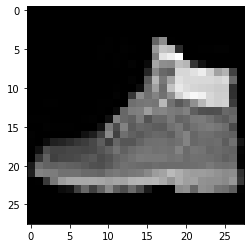

In [12]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 90 # Change to choose new article
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

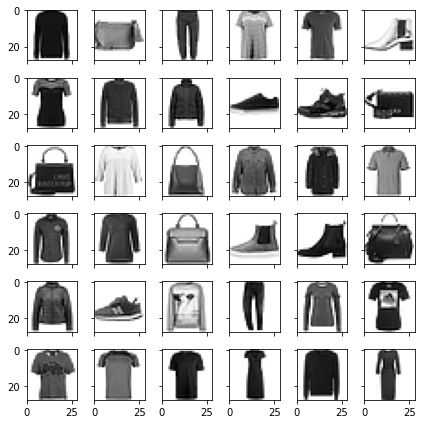

In [13]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()


### Training/Fitting CNN - Fashion

The following code will train the CNN for 20,000 steps.  This can take awhile, you might want to scale the step count back. GPU training can help.  My results:

* CPU Training Time: Elapsed time: 1:50:13.10
* GPU Training Time: Elapsed time: 0:13:43.06

In [14]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


In [15]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
469/469 - 3s - loss: 0.5379 - accuracy: 0.8104 - val_loss: 0.3399 - val_accuracy: 0.8761
Epoch 2/12
469/469 - 3s - loss: 0.3465 - accuracy: 0.8768 - val_loss: 0.2877 - val_accuracy: 0.8936
Epoch 3/12
469/469 - 3s - loss: 0.2996 - accuracy: 0.8927 - val_loss: 0.2594 - val_accuracy: 0.9018
Epoch 4/12
469/469 - 3s - loss: 0.2652 - accuracy: 0.9043 - val_loss: 0.2431 - val_accuracy: 0.9100
Epoch 5/12
469/469 - 3s - loss: 0.2418 - accuracy: 0.9114 - val_loss: 0.2335 - val_accuracy: 0.9140
Epoch 6/12
469/469 - 3s - loss: 0.2230 - accuracy: 0.9194 - val_loss: 0.2185 - val_accuracy: 0.9191
Epoch 7/12
469/469 - 3s - loss: 0.2055 - accuracy: 0.9241 - val_loss: 0.2257 - val_accuracy: 0.9176
Epoch 8/12
469/469 - 3s - loss: 0.1900 - accuracy: 0.9294 - val_loss: 0.2118 - val_accuracy: 0.9235
Epoch 9/12
469/469 - 3s - loss: 0.1775 - accuracy: 0.9344 - val_loss: 0.2130 - val_accuracy: 0.9244
Epoch 10/12
469/469 - 3s - loss: 0.1670 - accuracy: 0.9375 - val_loss: 0.2181 - val_accuracy: 0.9220